<h1 align="center"> IFT6269-A2017  Homework 5</h1>
<h1 align="center"> </h1>

<h3 style="line-height:1.5em"> 
Instructor  : Simon Lacoste-Julien <br>
Solution by : Dong-Hyun Lee
</h3>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sig(x) :
    return 1./(1.+ np.exp(-x))

def nearest_4neighbors(x, i, j) :
    nn1 = x[i-1,j] if i > 0 else x[-1,j];
    nn2 = x[i+1,j] if i < x.shape[0]-1 else x[0,j];
    nn3 = x[i,j-1] if j > 0 else x[i,-1];
    nn4 = x[i,j+1] if j < x.shape[1]-1 else x[i,0];
    return nn1, nn2, nn3, nn4

x = (np.random.rand(7,7) > 0.5).astype(int)
samples = np.zeros((7,7,5000))
mu = np.zeros((7,7,10))
for trial in range(10) :
    for e in range(6000) :
        for i in range(7) :
            for j in range(7) :
                nn1, nn2, nn3, nn4 = nearest_4neighbors(x, i, j)
                prob = sig( (-1)**(7*i+j+1) + 0.5*(nn1+nn2+nn3+nn4) )
                x[i,j] = (np.random.rand() < prob).astype(int)
        if e >= 1000 :
            samples[:,:,e-1000] = x[:,:]
        
    mu[:,:,trial] = samples.mean(axis=2)

print "The mean : "
print mu.mean(axis=2)
print
print "The standard deviation : "
print mu.std(axis=2)
    
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.pcolor(mu.mean(axis=2), cmap=plt.cm.gray, alpha=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()

The mean : 
[[ 0.6264   0.91574  0.6655   0.91732  0.66748  0.91562  0.62828]
 [ 0.91428  0.68772  0.90442  0.68922  0.9068   0.69384  0.91562]
 [ 0.66368  0.9065   0.68874  0.90824  0.69166  0.90518  0.66382]
 [ 0.91606  0.69034  0.90778  0.69198  0.9076   0.69064  0.9143 ]
 [ 0.66518  0.90802  0.6907   0.90756  0.69518  0.9085   0.66462]
 [ 0.91362  0.69146  0.90608  0.69122  0.90634  0.68756  0.91202]
 [ 0.63098  0.91382  0.6674   0.91816  0.66898  0.91542  0.6283 ]]

The standard deviation : 
[[ 0.00550999  0.00270118  0.00476508  0.00401915  0.00823903  0.00379521
   0.00572866]
 [ 0.00452831  0.00681715  0.00240741  0.0053295   0.00442809  0.0055791
   0.00370238]
 [ 0.00720178  0.0053331   0.00433963  0.0041625   0.00527867  0.00412063
   0.00440495]
 [ 0.00250288  0.0044064   0.00433262  0.00530317  0.00285937  0.0052106
   0.00508508]
 [ 0.00725504  0.00467714  0.00577668  0.0041413   0.00567059  0.00278173
   0.00703787]
 [ 0.00647175  0.00818977  0.00385456  0.00390123  0.00

C:\Users\Sarath\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Epoch   1,  Dist = 0.340828,  KL - log Zp = -57.314754
Epoch   2,  Dist = 0.065060,  KL - log Zp = -58.112787
Epoch   3,  Dist = 0.008936,  KL - log Zp = -58.132646
Epoch   4,  Dist = 0.001250,  KL - log Zp = -58.132998
Epoch   5,  Dist = 0.000152,  KL - log Zp = -58.133004

The tau_s : 
[[ 0.63574171  0.92150448  0.67159358  0.92283294  0.67162573  0.92152352
   0.63582096]
 [ 0.92150417  0.69776034  0.91540468  0.69738216  0.91541687  0.6978062
   0.92153182]
 [ 0.67159904  0.91540368  0.69669845  0.91634933  0.69670537  0.915419
   0.67165563]
 [ 0.92283246  0.69738379  0.91635035  0.69690295  0.91634777  0.69740607
   0.92285249]
 [ 0.67162972  0.91541914  0.69671339  0.91634921  0.69671787  0.91542515
   0.67166182]
 [ 0.92152516  0.69781206  0.91542135  0.6974059   0.91542505  0.69782016
   0.9215359 ]
 [ 0.63582226  0.92153271  0.67165504  0.9228524   0.67166127  0.92153582
   0.63584089]]

Distance between tau_s and mu_s :  0.00708648611605


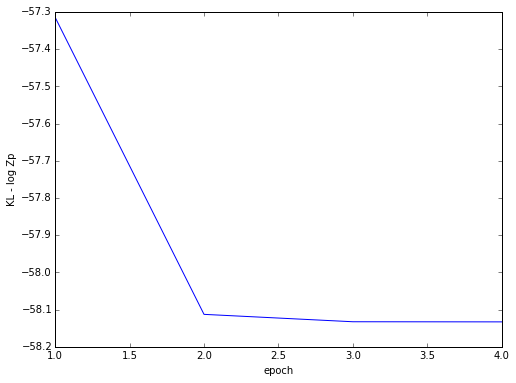

In [3]:
tau = np.random.rand(7,7)
old_tau = np.random.rand(7,7)               
KL = np.zeros((6000,))

for e in range(6000) :
    old_tau[:,:] = tau[:,:]
    for i in range(7) :
        for j in range(7) :
            nn1, nn2, nn3, nn4 = nearest_4neighbors(tau, i, j)
            tau[i,j] = sig( (-1)**(7*i+j+1) + 0.5*(nn1+nn2+nn3+nn4) )
    # compute KL - log Z_p
    for i in range(7) :
        for j in range(7) :
            KL[e] += - (-1)**(7*i+j+1) * tau[i,j] 
            nn1, nn2, nn3, nn4 = nearest_4neighbors(tau, i, j)
            KL[e] += - 0.5*tau[i,j]*(nn1+nn2+nn3+nn4)/2 # to avoid duplication
            KL[e] += tau[i,j] * np.log(tau[i,j])
            KL[e] += (1-tau[i,j]) * np.log(1-tau[i,j])
            
    dist = np.abs(tau-old_tau).mean()
    print "Epoch %3d,  Dist = %f,  KL - log Zp = %f" %(e+1, dist, KL[e])
    if dist < 0.001 :
        break

print 
print "The tau_s : "
print tau

dist = np.abs(tau-mu.mean(axis=2)).mean()
print 
print "Distance between tau_s and mu_s : ", dist

plt.figure(figsize=(8,6))
plt.xlabel('epoch')
plt.ylabel('KL - log Zp')
plt.plot(range(1,e+1),KL[:e])
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.pcolor(tau, cmap=plt.cm.gray, alpha=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()